# Cloud Botany shallow convection simulations
## offline calculations of mesoscale pattern entropy (information) 

### Working with a downloaded 256x256 subset
#### grabbed/saved by other notebook in this folder 

In [3]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np # https://github.com/numpy/numpy/issues/23775
import pandas as pd

In [4]:
ds_profiles = xr.open_dataset('/Users/bmapes/Box/EvolutionaryConvection/CloudBotany/CloudBotany_profilesuv.nc')
ds_profiles      #.wthvt[10][10].plot() # typical value 0.01

<xarray.Dataset>
Dimensions:  (member: 103, time: 720, zm: 175, zt: 175)
Coordinates:
  * member   (member) int64 1 2 3 4 5 6 7 8 9 ... 95 96 97 98 99 100 101 102 103
  * time     (time) datetime64[ns] 2020-02-01T00:05:00 ... 2020-02-03T12:00:00
  * zm       (zm) float32 0.0 15.0 30.0 45.3 ... 6.772e+03 6.854e+03 6.938e+03
  * zt       (zt) float32 7.5 22.5 37.65 52.95 ... 6.813e+03 6.896e+03 6.98e+03
Data variables:
    wthvt    (member, time, zm) float32 ...
    ql       (member, time, zt) float32 ...
    ql2r     (member, time, zt) float32 ...
    cfrac    (member, time, zt) float32 ...
    w2r      (member, time, zm) float32 ...
    u        (member, time, zt) float32 ...
    v        (member, time, zt) float32 ...
Attributes:
    Author:   
    Source:   DALES 4.2 git: v4.3-108-gca69cb
    history:  Created on 20220520 at 213340.423
    title:    profiles.001.nc

# KE age (energy throughput, Integrated Buoyancy Flux IBF) 
## of each cloud scene

$ d/dt<[KE]> = <[w * dw/dt]> = <[wb]> $

$ = <  w' \cdot \theta_v' > g/ \theta_{v_0}  $

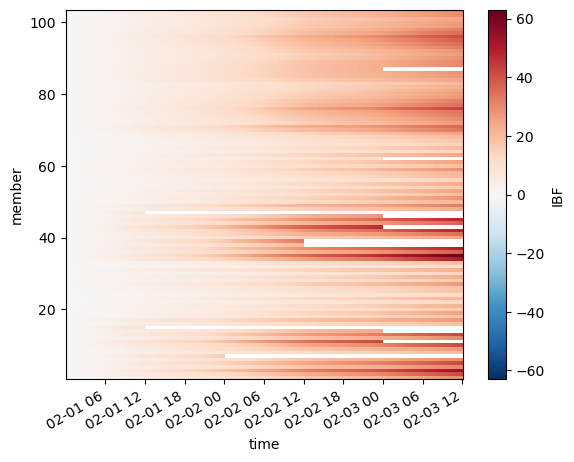

In [5]:
# Time integrate (cumulate) the vertical mean KE source from buoyancy flux
g_over_th0 = 9.81/290 # approximately constant theta-v for environment unit conversion

ds_profiles['IBF'] = ds_profiles.wthvt.mean('zm').cumulative_integrate('time','s') \
                        *g_over_th0
ds_profiles.IBF.plot() 

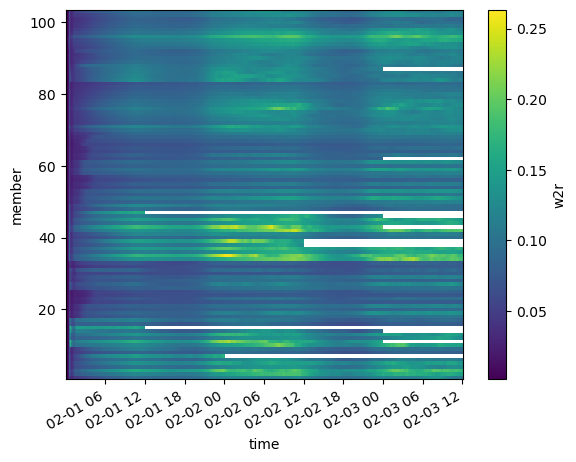

In [6]:
# Actual VKE (w2r): ratio implies ~1/4 hour bulk residence time...
# so there are ~100 turnovers per day in bulk VKE 

ds_profiles.w2r.mean('zm').plot()  

-------------------
# 2D fields: make images with hodographs 

Exploring the role of wind and wind shear in the lines/waves that appear in the images. 

In [9]:
dstq = xr.open_dataset('/Users/bmapes//Box/EvolutionaryConvection/CloudBotany/CloudBotany_patterns256_twp_Navwifi.nc')
dstq

<xarray.Dataset>
Dimensions:  (member: 103, time: 18, yt: 256, xt: 256)
Coordinates:
  * member   (member) int32 1 2 3 4 5 6 7 8 9 ... 95 96 97 98 99 100 101 102 103
  * time     (time) datetime64[ns] 2020-02-01T00:05:00 ... 2020-02-03T08:45:00
  * xt       (xt) float64 50.0 650.0 1.25e+03 ... 1.518e+05 1.524e+05 1.53e+05
  * yt       (yt) float64 50.0 650.0 1.25e+03 ... 1.518e+05 1.524e+05 1.53e+05
Data variables:
    twp      (member, time, yt, xt) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu May 26 04:40:08 2022: cdo -f nc4 -z zip_6 -r -O collgri...
    title:        000/cape.x000y000.001.nc

In [8]:
ds_2D = xr.open_dataset('/Users/bmapes/Box/EvolutionaryConvection/CloudBotany/CloudBotany_patterns256.nc')
ds_2D

<xarray.Dataset>
Dimensions:   (member: 103, time: 18, yt: 256, xt: 256)
Coordinates:
  * member    (member) int32 1 2 3 4 5 6 7 8 9 ... 96 97 98 99 100 101 102 103
  * time      (time) datetime64[ns] 2020-02-01T00:05:00 ... 2020-02-03T08:45:00
  * xt        (xt) float64 50.0 650.0 1.25e+03 ... 1.518e+05 1.524e+05 1.53e+05
  * yt        (yt) float64 50.0 650.0 1.25e+03 ... 1.518e+05 1.524e+05 1.53e+05
Data variables:
    lwp       (member, time, yt, xt) float32 ...
    surfprec  (member, time, yt, xt) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu May 26 04:40:08 2022: cdo -f nc4 -z zip_6 -r -O collgri...
    title:        000/cape.x000y000.001.nc

------------------
# Compute linear orientation and strength 

Fourier codes, see also in download notebook at bottom 

In [13]:
image = np.sqrt(ds_2D.lwp[3][8])
cloud_pattern = image.values

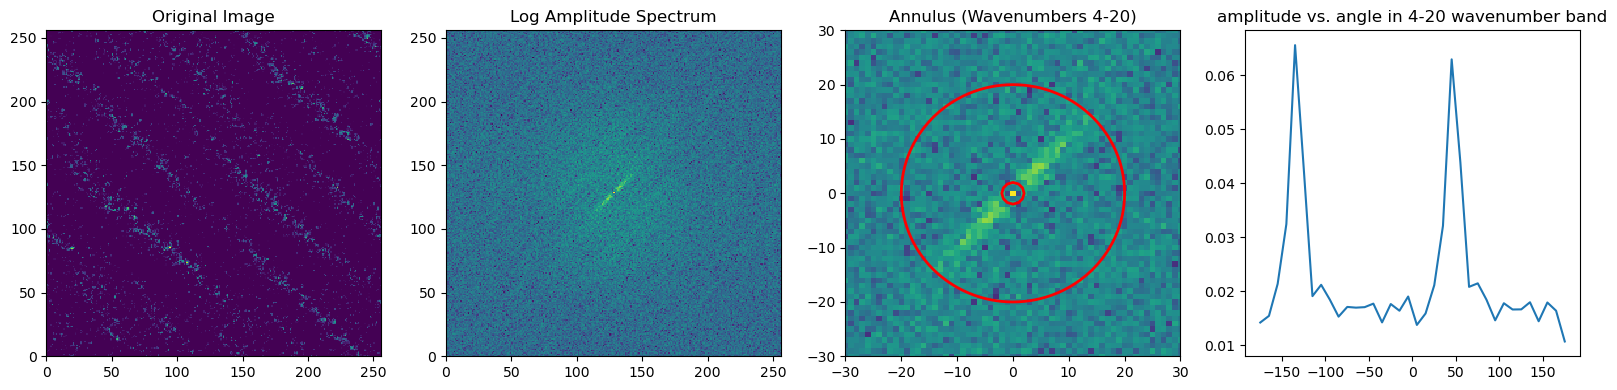

angle is  4 -2.436516649627527 -134.60623808147537 45.39376191852463
strength is  2.9699133209391624


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift
from scipy.optimize import curve_fit

# Generate a sample image (replace this with your cloud probability distribution)
image_size = cloud_pattern.shape[0]

# Apply Fourier Transform
fft_result = fft2(cloud_pattern)

# Shift zero frequency components to the center
fft_result_shifted = fftshift(fft_result)

# Calculate amplitude
amplitude = np.abs(fft_result_shifted)


# Create 2D wavenumber array
kx = np.fft.fftshift(np.fft.fftfreq(image_size, d=1/image_size)) 
ky = np.fft.fftshift(np.fft.fftfreq(image_size, d=1/image_size))
kx, ky = np.meshgrid(kx, ky)

# Calculate total wavenumber array
wavenumbers = np.sqrt(kx**2 + ky**2)


# Calculate the polar coordinates
radius = np.sqrt(kx**2 + ky**2)
theta = np.arctan2(ky, kx)

# Average the amplitude where the TOTAL wavenumber is between 4 and 20
min_wavenumber = 2
max_wavenumber = 20
in_k_range = (radius>min_wavenumber) & (radius<max_wavenumber)


# Create theta bins
num_bins = 36  # 10 degrees each bin 
theta_bins = np.linspace(np.min(theta), np.max(theta), num_bins + 1)

# Calculate the mean amplitude in each theta bin
mean_amplitude = np.zeros(num_bins)
for i in range(num_bins):
    in_bin = (theta >= theta_bins[i]) & (theta < theta_bins[i + 1])
    mean_amplitude[i] = np.mean(amplitude * in_k_range * in_bin)


# Plot the original image, amplitude, the annulus, and the fitted sinusoidal curve
plt.figure(figsize=(16, 4))

plt.subplot(141)
plt.pcolormesh(cloud_pattern, cmap='viridis')
plt.title('Original Image')

plt.subplot(142)
plt.pcolormesh(np.log1p(amplitude), cmap='viridis')
plt.title('Log Amplitude Spectrum')

plt.subplot(143)
plt.pcolormesh(kx,ky, np.log1p(amplitude), cmap='viridis')
ax = plt.gca()
ax.set_xlim([-30, 30])
ax.set_ylim([-30, 30])
plt.contour(kx,ky,radius, levels=[min_wavenumber, max_wavenumber], colors='r', linewidths=2)
plt.title('Annulus (Wavenumbers 4-20)')

plt.subplot(144)
plt.plot(theta_bins[:-1] *180/3.1415 + 360/num_bins/2, mean_amplitude)
plt.title('amplitude vs. angle in 4-20 wavenumber band')

plt.plot() 

plt.tight_layout()
plt.show()


argmx = np.argmax(mean_amplitude)
maxangle = theta_bins[ argmx ]
maxangledeg = theta_bins[ argmx ] *180/3.1415 + 360/num_bins/2

print('angle is ', argmx, maxangle, maxangledeg, maxangledeg+180)
print('strength is ',np.max(mean_amplitude)/np.mean(mean_amplitude) )

# Print the fitted parameters
#amplitude_fit, phase_fit, offset_fit = popt
#print(f"Amplitude of the Fit: {amplitude_fit}")
#print(f"Phase of the Fit: {phase_fit*1800./3.142}")
#print(f"Offset of the Fit: {offset_fit}")


## Loop to make image files with labels in filename
Browsed and removed all the bad ones (no cloud black, no data white, a few had missing squares??)

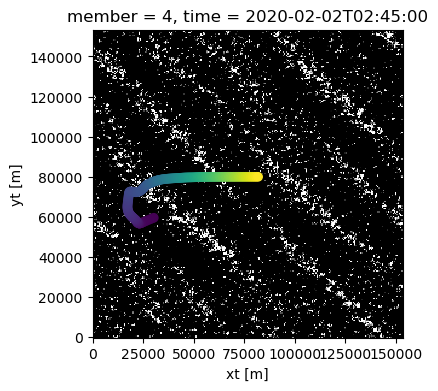

In [50]:
# square root of cloud water looks cloudlike
# Hodograph is a scatterplot, central point is u=v=0 and scaled to fit, 80000+5000*u on m scale
# plt.scatter( 80000+5000*ds_profiles.u[3][8], 80000+5000*ds_profiles.v[3][8] , c=ds_profiles.zt)

In [ ]:
# HODOGRAPH on top of sqrt(cloudwater) field 
# select every 40th time to match 2D field index

ds_profiles = xr.open_dataset('/Users/bmapes/Box/EvolutionaryConvection/CloudBotany/CloudBotany_profilesuv.nc')\
                .isel(time=slice(None, None, 40)) 

for mem in ds_2D.member.values:
    for it in range(2,18): 
        
        filename = 'sim'+str(mem)+'_time'+str(it)+'.png'
                    #+'_KEage_'+ "{:.2f}".format(ds_profiles.IBF.sel(member=mem, time=ds_2D.time[it]).values)

        sq = ds_2D.lwp[mem][it]
        
        if not( np.isnan(sq).any() ):  # if any missing data nan
            np.sqrt(sq).plot(vmin=0, vmax=0.25, cmap='Greys_r', add_colorbar=False, size=4, aspect=1)
            plt.scatter( 80000+5000*ds_profiles.u[mem][it], 80000+5000*ds_profiles.v[mem][it] , c=ds_profiles.zt)
            plt.axis('off'); plt.title('');
            plt.savefig('/Users/bmapes/Box/EvolutionaryConvection/CloudBotany/Images_cloudwater_hodo/'+filename, bbox_inches='tight')
            plt.close()

----------------
# Relating pattern information H to age and to IBF (KE throughput)
### are other factors important? accumulated precip? shear/isotropy?

What do I mean by pattern information? Deviations from maximum entropy (uniformity) of a PDF. But what PDF? Here I want to measure *spatial* nonuniformity of cloudiness at *coarse* scales, setting aside *total cloudiness* variations across all the snapshots. For this reason, my PDF should be **the probability of being in the upper decile of LWP**, which can then be coarse-grained (block-averaged) to various resolutions. Of course IF CLOUD COVER IS LESS THAN 10%, this will fail (the decile coverage will be the cloud cover itself). Discard those scenes.  

#### Structure of results arrays for correlating: 
information H, Integrated Buoyancy Flux IBF, Integrated Precip IP, age itself. 

H(member,age,octave of rebinning 2,4,8,...) = Smax-S where S is entropy

IBF(member, age)

IP(member, age) = ds_2D.surfprec.sum(dims=['xt','yt'])

age(member, age) 

Q: Might the information at each coarse-grain scale add up to the total information, like variance in Parseval's theorem for orthogonal Fourier analysis? Need to study as math perhaps, will see in numbers here.

In [10]:
# predictors of information H to be examined 

ds_profiles['IP'] = ds_2D.surfprec.sum(dim=['xt','yt'])
ds_profiles['age'] = ds_profiles.time
ds_profiles['IBF'] = ds_profiles.wthvt.mean('zm').cumulative_integrate('time','s') \
                        *g_over_th0

In [11]:
def information(PDF): 
    # just make sure it is a PDF (sums to one) 
    PDF = PDF/np.sum(PDF)

    # information subtracts a same-sized but uniform PDF, p=1/size(PDF) 
    nullPDF = 1./ np.size(PDF)

    # for log2, need to make sure the zeros are replaced with 1e-99
    H = -np.log2(nullPDF) - (-np.sum( PDF * np.log2(PDF+1e-99)))
    
    return(H)

In [12]:
# Loop to compute pattern information H 

octaves = 2**np.linspace(0,7,8) # REBIN 2x, 4x, ... floats 2.,4,8,...128.

# Structure of results: 
NMEM = ds_2D.member.values.size
NT = 18
NOCT = octaves.size

# Information entropy values H: container for results of loop 
Hs = np.zeros( (NMEM,NT,NOCT) )

# THE BIG LOOP 
for mem in range( ds_2D.member.size ):
    print('simulation ',mem)
    for it in range(2,18): 
        sq = ds_2D.lwp[mem][it]
        
# create 'active' and 'p_active' arrays: 1 for top 10% of LWP, all others 0
        decile9 = np.sort( np.ravel( sq.values) )[9*sq.size//10]   # 9/10 decile 
        active = (sq > decile9)
        p_active = active/np.sum(active) # probability, because it sums to 1
        
# LOOP over coarsening blocks, resampled back onto 256x256 grid 
        for isc,scale in enumerate(octaves): 
            blocksize = int(scale)
            cp_active = p_active.coarsen(xt=blocksize, yt=blocksize).mean().\
                interp_like(active, method='nearest', kwargs={"fill_value": "extrapolate"})

# Collect the result: information H in bits, from the coarsened p_active array 
            Hs[mem,it,isc] = information(cp_active)

            if( Hs[mem,it,isc] < 0 ): 
                print('negative, what th? ',mem,it,isc, Hs[mem,it,isc] ) 
                stop
                
## Set Hs for problematic cases: all white, all black (uniform), or if quintile is zero
            if( np.isnan(sq).any() ):  # if any missing data nan
                Hs[mem,it,isc] = 0   # no information is present
            if( (sq == 0).sum() > 0.9*65536 ):      # if cloud fraction is < 10% 
                Hs[mem,it,isc] = 0   # declare it zero  

simulation  0
simulation  1
simulation  2
simulation  3
simulation  4
simulation  5
simulation  6
simulation  7
simulation  8
simulation  9
simulation  10
simulation  11
simulation  12
simulation  13
simulation  14
simulation  15
simulation  16
simulation  17
simulation  18
simulation  19
simulation  20
simulation  21
simulation  22
simulation  23
simulation  24
simulation  25
simulation  26
simulation  27
simulation  28
simulation  29
simulation  30
simulation  31
simulation  32
simulation  33
simulation  34
simulation  35
simulation  36
simulation  37
simulation  38
simulation  39
simulation  40
simulation  41
simulation  42
simulation  43
simulation  44
simulation  45
simulation  46
simulation  47
simulation  48
simulation  49
simulation  50
simulation  51
simulation  52
simulation  53
simulation  54
simulation  55
simulation  56
simulation  57
simulation  58
simulation  59
simulation  60
simulation  61
simulation  62
simulation  63
simulation  64
simulation  65
simulation  66
simul

In [13]:
ds_profiles

<xarray.Dataset>
Dimensions:  (member: 103, time: 720, zm: 175, zt: 175)
Coordinates:
  * member   (member) int64 1 2 3 4 5 6 7 8 9 ... 95 96 97 98 99 100 101 102 103
  * time     (time) datetime64[ns] 2020-02-01T00:05:00 ... 2020-02-03T12:00:00
  * zm       (zm) float32 0.0 15.0 30.0 45.3 ... 6.772e+03 6.854e+03 6.938e+03
  * zt       (zt) float32 7.5 22.5 37.65 52.95 ... 6.813e+03 6.896e+03 6.98e+03
Data variables:
    wthvt    (member, time, zm) float32 0.02832 0.02508 ... -1.964e-06
    ql       (member, time, zt) float32 ...
    ql2r     (member, time, zt) float32 ...
    cfrac    (member, time, zt) float32 ...
    w2r      (member, time, zm) float32 0.0 5.471e-05 ... 5.767e-05 1.475e-05
    u        (member, time, zt) float32 ...
    v        (member, time, zt) float32 ...
    IBF      (member, time) float64 0.0 0.003534 0.01365 ... 30.28 30.33 30.38
    IP       (member, time) float32 0.0 nan nan nan nan ... nan nan nan nan nan
    age      (time) datetime64[ns] 2020-02-01T00:05:00 ... 2020-02-03T12:00:00
Attributes:
    Author:   
    Source:   DALES 4.2 git: v4.3-108-gca69cb
    history:  Created on 20220520 at 213340.423
    title:    profiles.001.nc

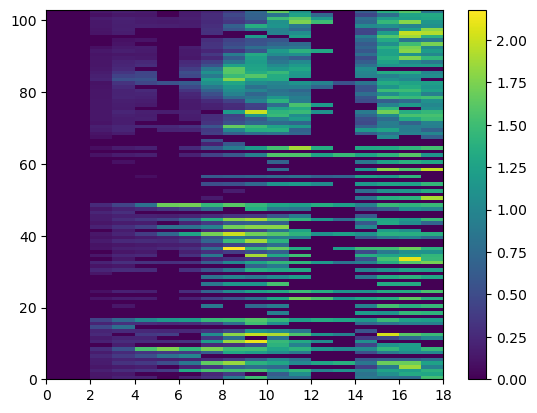

In [14]:
# Octave 3 (8x8 rebin boxes, 32x32 is the number of these) gives a good result 
# call it "mesoscale" (all wavenumbers smaller than 32 in these pretty big domains)

plt.pcolormesh( Hs[:,:,3] ); plt.colorbar()

Text(0.5, 0, 'hours into simulation')

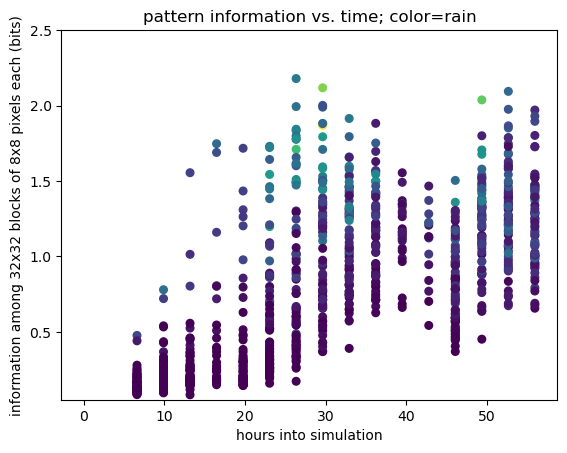

In [19]:
mytimes = ds_profiles.time.sel(time = ds_2D.time) 
dtime = (mytimes - mytimes[0])
dtime = dtime *56/max(dtime) # lazy, simply rescale to make total time 56 hours 

plt.scatter( np.meshgrid(dtime,ds_profiles.member)[0], \
            Hs[:,:,3], c=ds_profiles.IP.sel(time = ds_2D.time), s=30)
plt.ylim([0.05,2.5])
plt.title('pattern information vs. time; color=rain');
plt.ylabel('information among 32x32 blocks of 8x8 pixels each (bits)')
plt.xlabel('hours into simulation')

Text(0.5, 0, 'Integrated buoyancy flux (J/m$^2$)')

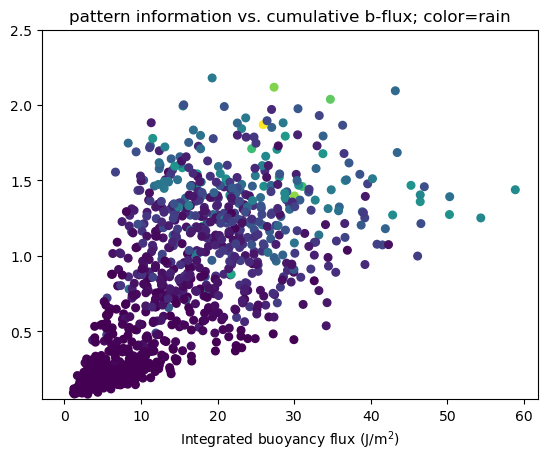

In [20]:
plt.scatter( ds_profiles.IBF.sel(time = ds_2D.time), Hs[:,:,3], \
            c=ds_profiles.IP.sel(time = ds_2D.time), \
            s=30)
plt.ylim([0.05,2.5])
plt.title('pattern information vs. cumulative b-flux; color=rain');
#plt.ylabel('pattern information among 32x32 blocks (bits)')
plt.xlabel('Integrated buoyancy flux (J/m$^2$)')

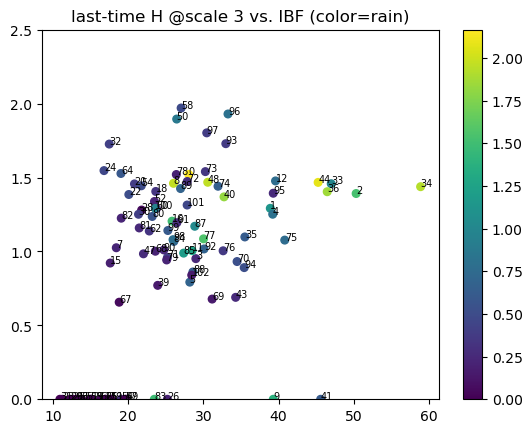

In [21]:
# Final time level, annotate with experiment number for case studies 
# Apparently precip is correlated with large IBF cases, makes sense perhaps 

plt.scatter( ds_profiles.IBF.sel(time = ds_2D.time)[:,-1], Hs[:,-1,3], \
            c=ds_profiles.IP.sel(time = ds_2D.time)[:,-1], s=30) 

xxx = ds_profiles.IBF.sel(time = ds_2D.time)[:,-1]
yyy = Hs[:,-1,3]
m=np.array( range(103) ).astype(str)

for iii in range(103):
    plt.annotate(m[iii], [xxx[iii],yyy[iii]], size=7)

plt.ylim([0,2.5])
plt.colorbar()
plt.title('last-time H @scale 3 vs. IBF (color=rain)');

In [22]:
# parameters of selected cases from above

df_parameters.iloc[ [2,9,32,33,34,35,36] ]  # dataset from other CloudBotany notebook on server

NameError: name 'df_parameters' is not defined

In [23]:
256/octaves[3]  # shape (or number of bins) in this octave = 3 

32.0

In [ ]:
# information spectrum by scale, *averaged over members* (18 times)

labels = np.array( range(9) ).astype(str)

Hspectra = Hs.mean(0).transpose()
plt.plot(Hspectra[:,0:9], label=labels );
plt.legend(loc='upper right')

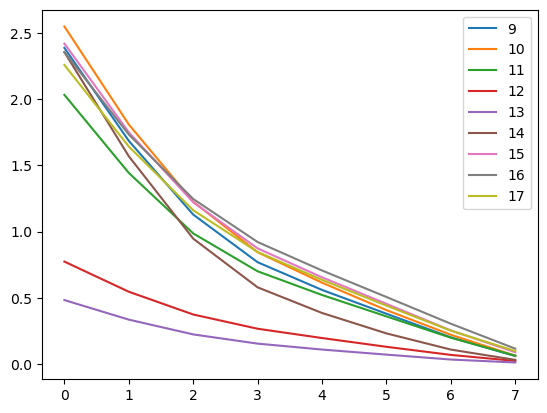

In [622]:
# information spectrum by scale, *averaged over members* (18 times)
labels = (np.array( range(9) )+9).astype(str)

Hspectra = Hs.mean(0).transpose()
plt.plot(Hspectra[:,9:], label=labels );
plt.legend(loc='upper right')

---------------
# Some stray code bits 

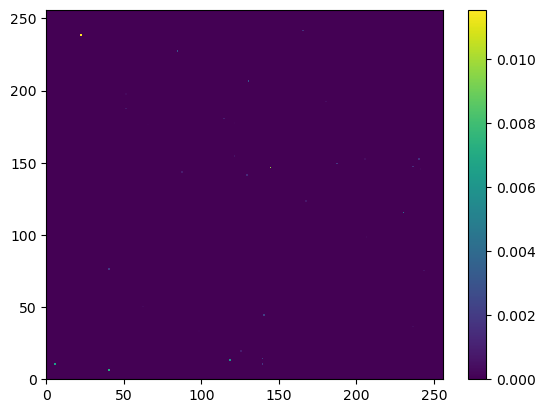

In [491]:
np.where(Hs > 4) # use this to find cases 

mem=17
it=5
sq = ds_2D.lwp[mem][it]
plt.pcolormesh(sq); plt.colorbar()

<xarray.DataArray 'lwp' ()>
array(10.91253716)
Coordinates:
    member   int32 18
    time     datetime64[ns] 2020-02-01T16:45:00

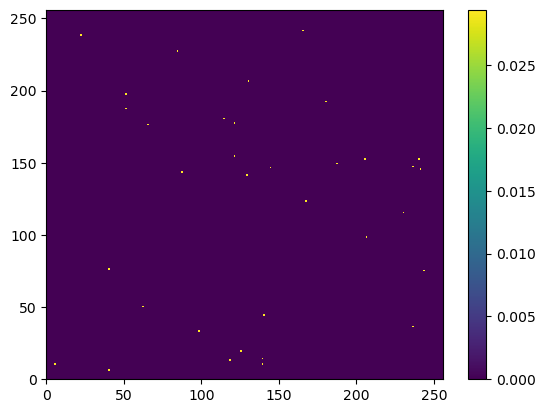

In [495]:
# create 'active' and 'p_active' arrays: 1 for top 10% of LWP, all others 0
decile9 = np.sort( np.ravel( sq.values) )[9*sq.size//10]   # 9/10 decile 
active = (sq > decile9)
p_active = active/np.sum(active) # probability, because it sums to 1

plt.pcolormesh(p_active); plt.colorbar()
# LOOP over coarsening blocks, resampled back onto 256x256 grid 
information(p_active)


In [497]:
PDF = p_active
PDF = PDF/np.sum(PDF)

# information subtracts a same-sized but uniform PDF, p=1/size(PDF) 
nullPDF = 1./ np.size(PDF)

# for log2, need to make sure the zeros are replaced with 1e-99
H1 = -np.log2(nullPDF) 
H2 = (-np.sum( PDF * np.log2(PDF+1e-99)))

print(H1,H2.values)

16.0 5.087462841250338


In [502]:
(sq == 0).sum() #65502/65536

<xarray.DataArray 'lwp' ()>
array(65502)
Coordinates:
    member   int32 18
    time     datetime64[ns] 2020-02-01T16:45:00

# other morphometrics besides entropy? 
### maybe someday 

To compute cloud scene morpho metrics, follow [this repo](https://github.com/martinjanssens/cloudmetrics) and do 

`import cloudmetrics`

`iorg = cloudmetrics.iorg(cloud_mask=da_cloudmask)`

In [510]:
# nice Jupyter trick to see all the commands, if I deleted a code cell by accident 

%history  

import eurec4a
cat = eurec4a.get_intake_catalog()
botany_cat = cat.simulations.DALES.botany
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/eurec4a/eurec4a-intake/master/catalog.yml")
cat
list(cat)
botany_cat = cat.simulations.DALES.botany
botany_cat
botany_cat?
botany_cat.dx100m
botany_cat.dx100m.nx1536
botany_cat.dx100m.nx1536.2D
botany_cat.dx100m.nx1536
import pandas as pd
varied_parameters = ['member','thls', 'u0', 'qt0', 'qt_lambda', 'thl_Gamma', 'wpamp', 'dudz', 'location']
parameters = cat.simulations.DALES.botany.dx100m.nx1536.parameters.read()
df_parameters = pd.DataFrame.from_records(parameters)[varied_parameters]
df_parameters
parameters
import xarray as xr

ds_profiles = botany_cat.dx100m.nx1536['profiles'].to_dask()
ds_profiles
ds_2D = botany_cat.dx100m.nx1536['2D'].to_dask()
ds_2D = botany_cat.dx100m.nx1536['2D'].to_dask()
ds_2D
from cycler import cycler

fig = plt.figure()
ax = plt.gca()
ax.set_prop_cycle(cycler(color=plt.cm.cividis(